In [1]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii, write_esri_ascii
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator, SinkFiller
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

from landlab.utils import watershed

In [2]:
# MEL-14 wet season year 1
(mg_m14_20201203_sfm,z_m14_20201203_sfm) = read_esri_ascii("m14/wsyr1/m14_20201203_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20210224_sfm,z_m14_20210224_sfm) = read_esri_ascii("m14/wsyr1/m14_20210224_sfm.asc", \
    name='topographic__elevation')

# MEL-14 dry season year 1
(mg_m14_20210603_sfm,z_m14_20210603_sfm) = read_esri_ascii("m14/dsyr1/m14_20210603_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20210914_sfm,z_m14_20210914_sfm) = read_esri_ascii("m14/dsyr1/m14_20210914_sfm.asc", \
    name='topographic__elevation')

# MEL-14 wet season year 2
(mg_m14_20220309_sfm,z_m14_20220309_sfm) = read_esri_ascii("m14/wsyr2/m14_20220309_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220316_sfm,z_m14_20220316_sfm) = read_esri_ascii("m14/wsyr2/m14_20220316_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220324_sfm,z_m14_20220324_sfm) = read_esri_ascii("m14/wsyr2/m14_20220324_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220411_sfm,z_m14_20220411_sfm) = read_esri_ascii("m14/wsyr2/m14_20220411_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220428_sfm,z_m14_20220428_sfm) = read_esri_ascii("m14/wsyr2/m14_20220428_sfm.asc", \
    name='topographic__elevation')
(mg_m14_20220601_sfm,z_m14_20220601_sfm) = read_esri_ascii("m14/wsyr2/m14_20220601_sfm.asc", \
    name='topographic__elevation')

## Cross-sectional profile plot

In [ ]:
# mg_m14_20220309_sfm.status_at_node[z_m14_20220309_sfm == -9999] = mg_m14_20220309_sfm.BC_NODE_IS_CLOSED
# mg_m14_20220316_sfm.status_at_node[z_m14_20220316_sfm == -9999] = mg_m14_20220316_sfm.BC_NODE_IS_CLOSED
# mg_m14_20220324_sfm.status_at_node[z_m14_20220324_sfm == -9999] = mg_m14_20220324_sfm.BC_NODE_IS_CLOSED
# mg_m14_20220411_sfm.status_at_node[z_m14_20220411_sfm == -9999] = mg_m14_20220411_sfm.BC_NODE_IS_CLOSED
# mg_m14_20220428_sfm.status_at_node[z_m14_20220428_sfm == -9999] = mg_m14_20220428_sfm.BC_NODE_IS_CLOSED
# mg_m14_20220601_sfm.status_at_node[z_m14_20220601_sfm == -9999] = mg_m14_20220601_sfm.BC_NODE_IS_CLOSED

In [ ]:
# nrows = mg_m14_20220309_sfm.number_of_node_rows

# z_m14_20220309_sfm[z_m14_20220309_sfm==-9999] = np.nan
# z_m14_20220316_sfm[z_m14_20220316_sfm==-9999] = np.nan
# z_m14_20220324_sfm[z_m14_20220324_sfm==-9999] = np.nan
# z_m14_20220411_sfm[z_m14_20220411_sfm==-9999] = np.nan
# z_m14_20220428_sfm[z_m14_20220428_sfm==-9999] = np.nan
# z_m14_20220601_sfm[z_m14_20220601_sfm==-9999] = np.nan


# elev_rast_20220309 = mg_m14_20220309_sfm.node_vector_to_raster(z_m14_20220309_sfm)
# xcoord_rast_20220309 = mg_m14_20220309_sfm.node_vector_to_raster(mg_m14_20220309_sfm.node_x)

# elev_rast_20220316 = mg_m14_20220316_sfm.node_vector_to_raster(z_m14_20220316_sfm)
# xcoord_rast_20220316 = mg_m14_20220316_sfm.node_vector_to_raster(mg_m14_20220316_sfm.node_x)

# elev_rast_20220324 = mg_m14_20220324_sfm.node_vector_to_raster(z_m14_20220324_sfm)
# xcoord_rast_20220324 = mg_m14_20220324_sfm.node_vector_to_raster(mg_m14_20220324_sfm.node_x)

# elev_rast_20220411 = mg_m14_20220411_sfm.node_vector_to_raster(z_m14_20220411_sfm)
# xcoord_rast_20220411 = mg_m14_20220411_sfm.node_vector_to_raster(mg_m14_20220411_sfm.node_x)

# elev_rast_20220428 = mg_m14_20220428_sfm.node_vector_to_raster(z_m14_20220428_sfm)
# xcoord_rast_20220428 = mg_m14_20220428_sfm.node_vector_to_raster(mg_m14_20220428_sfm.node_x)

# elev_rast_20220601 = mg_m14_20220601_sfm.node_vector_to_raster(z_m14_20220601_sfm)
# xcoord_rast_20220601 = mg_m14_20220601_sfm.node_vector_to_raster(mg_m14_20220601_sfm.node_x)

# fig, ax = plt.subplots(figsize=(10,4))
# plt.plot(xcoord_rast_20220309[int(nrows // 9.75),:], elev_rast_20220309[int(nrows // 9.75), :], color='#934545', label='03-09-2022')
# plt.plot(xcoord_rast_20220316[int(nrows // 9.75),:], elev_rast_20220316[int(nrows // 9.75), :], color='#ED7275', label='03-16-2022')
# plt.plot(xcoord_rast_20220324[int(nrows // 9.75),:], elev_rast_20220324[int(nrows // 9.75), :], color='#AFE8E7', label='03-24-2022')
# plt.plot(xcoord_rast_20220411[int(nrows // 9.75),:], elev_rast_20220411[int(nrows // 9.75), :], color='#ECBAB8', label='04-11-2022')
# plt.plot(xcoord_rast_20220428[int(nrows // 9.75),:], elev_rast_20220428[int(nrows // 9.75), :], color='#036563', label='04-28-2022')
# plt.plot(xcoord_rast_20220601[int(nrows // 9.75),:], elev_rast_20220601[int(nrows // 9.75), :], color='#A379C9', label='06-01-2022')
# plt.legend()
# plt.xlabel("X location (m)")
# plt.ylabel("Elevation (m)")
# plt.title('MEL-14 Wet2')
# plt.savefig('/home/adalvis/github/micro_diff/data/savefigs/Fig5.png', dpi=300, bbox_inches='tight')
# plt.show();

## Run flow router

In [3]:
mg_m14_20201203_sfm.status_at_node[z_m14_20201203_sfm == -9999] = mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20210224_sfm.status_at_node[z_m14_20210224_sfm == -9999] = mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE

mg_m14_20210603_sfm.status_at_node[z_m14_20210603_sfm == -9999] = mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20210914_sfm.status_at_node[z_m14_20210914_sfm == -9999] = mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE


mg_m14_20220309_sfm.status_at_node[z_m14_20220309_sfm == -9999] = mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220316_sfm.status_at_node[z_m14_20220316_sfm == -9999] = mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220324_sfm.status_at_node[z_m14_20220324_sfm == -9999] = mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220411_sfm.status_at_node[z_m14_20220411_sfm == -9999] = mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220428_sfm.status_at_node[z_m14_20220428_sfm == -9999] = mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220601_sfm.status_at_node[z_m14_20220601_sfm == -9999] = mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE

In [4]:
fa_m14_20201203_sfm = FlowAccumulator(mg_m14_20201203_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.005, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20210224_sfm = FlowAccumulator(mg_m14_20210224_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.005, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')



fa_m14_20210603_sfm = FlowAccumulator(mg_m14_20210603_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.005, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20210914_sfm = FlowAccumulator(mg_m14_20210914_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.005, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')




fa_m14_20220309_sfm = FlowAccumulator(mg_m14_20220309_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.005, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220316_sfm = FlowAccumulator(mg_m14_20220316_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.005, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220324_sfm = FlowAccumulator(mg_m14_20220324_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.005, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220411_sfm = FlowAccumulator(mg_m14_20220411_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.005, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220428_sfm = FlowAccumulator(mg_m14_20220428_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.005, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220601_sfm = FlowAccumulator(mg_m14_20220601_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.005, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

In [5]:
(da_m14_20201203_sfm, Q_m14_20201203_sfm) = fa_m14_20201203_sfm.accumulate_flow()
(da_m14_20210224_sfm, Q_m14_20210224_sfm) = fa_m14_20210224_sfm.accumulate_flow()

(da_m14_20210603_sfm, Q_m14_20210603_sfm) = fa_m14_20210603_sfm.accumulate_flow()
(da_m14_20210914_sfm, Q_m14_20210914_sfm) = fa_m14_20210914_sfm.accumulate_flow()

(da_m14_20220309_sfm, Q_m14_20220309_sfm) = fa_m14_20220309_sfm.accumulate_flow()
(da_m14_20220316_sfm, Q_m14_20220316_sfm) = fa_m14_20220316_sfm.accumulate_flow()
(da_m14_20220324_sfm, Q_m14_20220324_sfm) = fa_m14_20220324_sfm.accumulate_flow()
(da_m14_20220411_sfm, Q_m14_20220411_sfm) = fa_m14_20220411_sfm.accumulate_flow()
(da_m14_20220428_sfm, Q_m14_20220428_sfm) = fa_m14_20220428_sfm.accumulate_flow()
(da_m14_20220601_sfm, Q_m14_20220601_sfm) = fa_m14_20220601_sfm.accumulate_flow()

## Erosion index example

In [6]:
#calculate unit flow
q_m14_20201203_sfm = Q_m14_20201203_sfm/0.25
q_m14_20210224_sfm = Q_m14_20210224_sfm/0.25

q_m14_20210603_sfm = Q_m14_20210603_sfm/0.25
q_m14_20210914_sfm = Q_m14_20210914_sfm/0.25

q_m14_20220309_sfm = Q_m14_20220309_sfm/0.25
q_m14_20220316_sfm = Q_m14_20220316_sfm/0.25
q_m14_20220324_sfm = Q_m14_20220324_sfm/0.25
q_m14_20220411_sfm = Q_m14_20220411_sfm/0.25
q_m14_20220428_sfm = Q_m14_20220428_sfm/0.25
q_m14_20220601_sfm = Q_m14_20220601_sfm/0.25

In [7]:
#calculate slope
S_m14_20201203 = mg_m14_20201203_sfm.calc_slope_at_node(z_m14_20201203_sfm)
S_m14_20210224 = mg_m14_20210224_sfm.calc_slope_at_node(z_m14_20210224_sfm)

S_m14_20210603 = mg_m14_20210603_sfm.calc_slope_at_node(z_m14_20210603_sfm)
S_m14_20210914 = mg_m14_20210914_sfm.calc_slope_at_node(z_m14_20210914_sfm)

S_m14_20220309 = mg_m14_20220309_sfm.calc_slope_at_node(z_m14_20220309_sfm)
S_m14_20220316 = mg_m14_20220316_sfm.calc_slope_at_node(z_m14_20220316_sfm)
S_m14_20220324 = mg_m14_20220324_sfm.calc_slope_at_node(z_m14_20220324_sfm)
S_m14_20220411 = mg_m14_20220411_sfm.calc_slope_at_node(z_m14_20220411_sfm)
S_m14_20220428 = mg_m14_20220428_sfm.calc_slope_at_node(z_m14_20220428_sfm)
S_m14_20220601 = mg_m14_20220601_sfm.calc_slope_at_node(z_m14_20220601_sfm)

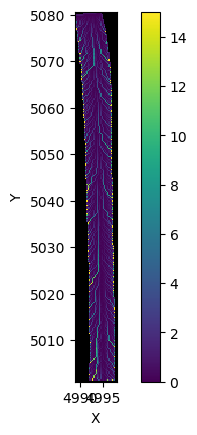

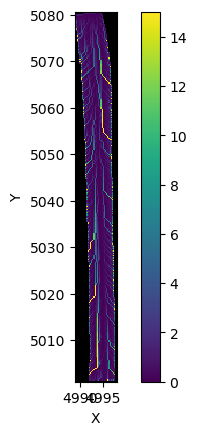

In [11]:
rho = 1000
g = 9.81
n_b = 0.05
beta = rho*g*n_b**0.6
m1 = 0.6
n1 = 0.7
tau_c = 0.566

#Calculate tau
tau_m14_20201203 = beta*q_m14_20201203_sfm**m1*S_m14_20201203**n1
tau_m14_20210224 = beta*q_m14_20210224_sfm**m1*S_m14_20210224**n1

tau_m14_20210603 = beta*q_m14_20210603_sfm**m1*S_m14_20210603**n1
tau_m14_20210914 = beta*q_m14_20210914_sfm**m1*S_m14_20210914**n1

tau_m14_20220309 = beta*q_m14_20220309_sfm**m1*S_m14_20220309**n1
tau_m14_20220316 = beta*q_m14_20220316_sfm**m1*S_m14_20220316**n1
tau_m14_20220324 = beta*q_m14_20220324_sfm**m1*S_m14_20220324**n1
tau_m14_20220411 = beta*q_m14_20220411_sfm**m1*S_m14_20220411**n1
tau_m14_20220428 = beta*q_m14_20220428_sfm**m1*S_m14_20220428**n1
tau_m14_20220601 = beta*q_m14_20220601_sfm**m1*S_m14_20220601**n1


#Add tau as field
mg_m14_20201203_sfm.add_field('tau', tau_m14_20201203, at='node', clobber=True)
mg_m14_20210224_sfm.add_field('tau', tau_m14_20210224, at='node', clobber=True)

mg_m14_20210603_sfm.add_field('tau', tau_m14_20210603, at='node', clobber=True)
mg_m14_20210914_sfm.add_field('tau', tau_m14_20210914, at='node', clobber=True)

mg_m14_20220309_sfm.add_field('tau', tau_m14_20220309, at='node', clobber=True)
mg_m14_20220316_sfm.add_field('tau', tau_m14_20220316, at='node', clobber=True)
mg_m14_20220324_sfm.add_field('tau', tau_m14_20220324, at='node', clobber=True)
mg_m14_20220411_sfm.add_field('tau', tau_m14_20220411, at='node', clobber=True)
mg_m14_20220428_sfm.add_field('tau', tau_m14_20220428, at='node', clobber=True)
mg_m14_20220601_sfm.add_field('tau', tau_m14_20220601, at='node', clobber=True)

#Fix nodata nodes
mg_m14_20201203_sfm.at_node['tau'][mg_m14_20201203_sfm.status_at_node==mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20210224_sfm.at_node['tau'][mg_m14_20210224_sfm.status_at_node==mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE] = 0

mg_m14_20210603_sfm.at_node['tau'][mg_m14_20210603_sfm.status_at_node==mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20210914_sfm.at_node['tau'][mg_m14_20210914_sfm.status_at_node==mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE] = 0

mg_m14_20220309_sfm.at_node['tau'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220316_sfm.at_node['tau'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220324_sfm.at_node['tau'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220411_sfm.at_node['tau'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220428_sfm.at_node['tau'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_m14_20220601_sfm.at_node['tau'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] = 0


#calculate erosion index - 1.5
idx_m14_20201203_15 = [(x-tau_c)**1.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20201203]
idx_m14_20210224_15 = [(x-tau_c)**1.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20210224]

idx_m14_20210603_15 = [(x-tau_c)**1.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20210603]
idx_m14_20210914_15 = [(x-tau_c)**1.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20210914]

idx_m14_20220309_15 = [(x-tau_c)**1.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220309]
idx_m14_20220316_15 = [(x-tau_c)**1.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220316]
idx_m14_20220324_15 = [(x-tau_c)**1.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220324]
idx_m14_20220411_15 = [(x-tau_c)**1.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220411]
idx_m14_20220428_15 = [(x-tau_c)**1.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220428]
idx_m14_20220601_15 = [(x-tau_c)**1.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220601]

#calculate erosion index - 2.5
idx_m14_20201203_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20201203]
idx_m14_20210224_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20210224]

idx_m14_20210603_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20210603]
idx_m14_20210914_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20210914]

idx_m14_20220309_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220309]
idx_m14_20220316_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220316]
idx_m14_20220324_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220324]
idx_m14_20220411_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220411]
idx_m14_20220428_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220428]
idx_m14_20220601_25 = [(x-tau_c)**2.5 if (x-tau_c)>=0 else 0 for x in tau_m14_20220601]

#sum dat index - 1.5
ero_idx_m14_20201203_15 = sum(mg_m14_20201203_sfm.add_field('ero_idx_15', idx_m14_20201203_15, at='node', clobber=True))
ero_idx_m14_20210224_15 = sum(mg_m14_20210224_sfm.add_field('ero_idx_15', idx_m14_20210224_15, at='node', clobber=True))

ero_idx_m14_20210603_15 = sum(mg_m14_20210603_sfm.add_field('ero_idx_15', idx_m14_20210603_15, at='node', clobber=True))
ero_idx_m14_20210914_15 = sum(mg_m14_20210914_sfm.add_field('ero_idx_15', idx_m14_20210914_15, at='node', clobber=True))

ero_idx_m14_20220309_15 = sum(mg_m14_20220309_sfm.add_field('ero_idx_15', idx_m14_20220309_15, at='node', clobber=True))
ero_idx_m14_20220316_15 = sum(mg_m14_20220316_sfm.add_field('ero_idx_15', idx_m14_20220316_15, at='node', clobber=True))
ero_idx_m14_20220324_15 = sum(mg_m14_20220324_sfm.add_field('ero_idx_15', idx_m14_20220324_15, at='node', clobber=True))
ero_idx_m14_20220411_15 = sum(mg_m14_20220411_sfm.add_field('ero_idx_15', idx_m14_20220411_15, at='node', clobber=True))
ero_idx_m14_20220428_15 = sum(mg_m14_20220428_sfm.add_field('ero_idx_15', idx_m14_20220428_15, at='node', clobber=True))
ero_idx_m14_20220601_15 = sum(mg_m14_20220601_sfm.add_field('ero_idx_15', idx_m14_20220601_15, at='node', clobber=True))

#sum dat index - 2.5
ero_idx_m14_20201203_25 = sum(mg_m14_20201203_sfm.add_field('ero_idx_25', idx_m14_20201203_25, at='node', clobber=True))
ero_idx_m14_20210224_25 = sum(mg_m14_20210224_sfm.add_field('ero_idx_25', idx_m14_20210224_25, at='node', clobber=True))

ero_idx_m14_20210603_25 = sum(mg_m14_20210603_sfm.add_field('ero_idx_25', idx_m14_20210603_25, at='node', clobber=True))
ero_idx_m14_20210914_25 = sum(mg_m14_20210914_sfm.add_field('ero_idx_25', idx_m14_20210914_25, at='node', clobber=True))

ero_idx_m14_20220309_25 = sum(mg_m14_20220309_sfm.add_field('ero_idx_25', idx_m14_20220309_25, at='node', clobber=True))
ero_idx_m14_20220316_25 = sum(mg_m14_20220316_sfm.add_field('ero_idx_25', idx_m14_20220316_25, at='node', clobber=True))
ero_idx_m14_20220324_25 = sum(mg_m14_20220324_sfm.add_field('ero_idx_25', idx_m14_20220324_25, at='node', clobber=True))
ero_idx_m14_20220411_25 = sum(mg_m14_20220411_sfm.add_field('ero_idx_25', idx_m14_20220411_25, at='node', clobber=True))
ero_idx_m14_20220428_25 = sum(mg_m14_20220428_sfm.add_field('ero_idx_25', idx_m14_20220428_25, at='node', clobber=True))
ero_idx_m14_20220601_25 = sum(mg_m14_20220601_sfm.add_field('ero_idx_25', idx_m14_20220601_25, at='node', clobber=True))

mg_m14_20201203_sfm.add_field('ero_idx_norm', np.divide(idx_m14_20201203_15,np.mean(idx_m14_20201203_15)), at='node', clobber=True)
mg_m14_20210224_sfm.add_field('ero_idx_norm', np.divide(idx_m14_20210224_15,np.mean(idx_m14_20201203_15)), at='node', clobber=True)

mg_m14_20210603_sfm.add_field('ero_idx_norm', np.divide(idx_m14_20210603_15,np.mean(idx_m14_20210603_15)), at='node', clobber=True)
mg_m14_20210914_sfm.add_field('ero_idx_norm', np.divide(idx_m14_20210914_15,np.mean(idx_m14_20210603_15)), at='node', clobber=True)

mg_m14_20220309_sfm.add_field('ero_idx_norm', np.divide(idx_m14_20220309_15,np.mean(idx_m14_20220309_15)), at='node', clobber=True)
mg_m14_20220316_sfm.add_field('ero_idx_norm', np.divide(idx_m14_20220316_15,np.mean(idx_m14_20220309_15)), at='node', clobber=True)
mg_m14_20220324_sfm.add_field('ero_idx_norm', np.divide(idx_m14_20220324_15,np.mean(idx_m14_20220309_15)), at='node', clobber=True)
mg_m14_20220411_sfm.add_field('ero_idx_norm', np.divide(idx_m14_20220411_15,np.mean(idx_m14_20220309_15)), at='node', clobber=True)
mg_m14_20220428_sfm.add_field('ero_idx_norm', np.divide(idx_m14_20220428_15,np.mean(idx_m14_20220309_15)), at='node', clobber=True)
mg_m14_20220601_sfm.add_field('ero_idx_norm', np.divide(idx_m14_20220601_15,np.mean(idx_m14_20220309_15)), at='node', clobber=True)

#Fix nodata nodes
mg_m14_20201203_sfm.at_node['ero_idx_norm'][mg_m14_20201203_sfm.status_at_node==mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE] =np.nan
mg_m14_20210224_sfm.at_node['ero_idx_norm'][mg_m14_20210224_sfm.status_at_node==mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE] =np.nan

mg_m14_20210603_sfm.at_node['ero_idx_norm'][mg_m14_20210603_sfm.status_at_node==mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE] =np.nan
mg_m14_20210914_sfm.at_node['ero_idx_norm'][mg_m14_20210914_sfm.status_at_node==mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE] =np.nan

mg_m14_20220309_sfm.at_node['ero_idx_norm'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] =np.nan
mg_m14_20220316_sfm.at_node['ero_idx_norm'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] =np.nan
mg_m14_20220324_sfm.at_node['ero_idx_norm'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] =np.nan
mg_m14_20220411_sfm.at_node['ero_idx_norm'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] =np.nan
mg_m14_20220428_sfm.at_node['ero_idx_norm'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] =np.nan
mg_m14_20220601_sfm.at_node['ero_idx_norm'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] =np.nan

imshow_grid(mg_m14_20220309_sfm, 'ero_idx_norm', vmin=0, vmax=15, cmap='viridis')
plt.show();
imshow_grid(mg_m14_20220601_sfm, 'ero_idx_norm', vmin=0, vmax=15, cmap='viridis')
plt.show()

In [ ]:
wsyr1_15 = [ero_idx_m14_20201203_15, ero_idx_m14_20210224_15]/ero_idx_m14_20201203_15
dsyr1_15 = [ero_idx_m14_20210603_15, ero_idx_m14_20210914_15]/ero_idx_m14_20210603_15
wsyr2_15 = [ero_idx_m14_20220309_15, ero_idx_m14_20220316_15, ero_idx_m14_20220324_15, ero_idx_m14_20220411_15, ero_idx_m14_20220428_15, ero_idx_m14_20220601_15]/ero_idx_m14_20220309_15

wsyr1_25 = [ero_idx_m14_20201203_25, ero_idx_m14_20210224_25]/ero_idx_m14_20201203_25
dsyr1_25 = [ero_idx_m14_20210603_25, ero_idx_m14_20210914_25]/ero_idx_m14_20210603_25
wsyr2_25 = [ero_idx_m14_20220309_25, ero_idx_m14_20220316_25, ero_idx_m14_20220324_25, ero_idx_m14_20220411_25, ero_idx_m14_20220428_25, ero_idx_m14_20220601_25]/ero_idx_m14_20220309_25

t_m14_wsyr1 = [0, 2.5]
t_m14_dsyr1 = [0, 3.5]
t_m14_wsyr2 = [0,0.25,0.5,1,1.75,3]

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(t_m14_wsyr1, wsyr1_15, '^--', color='#ECBAB8', markeredgecolor='k', label='Wet1')
ax[0].plot(t_m14_dsyr1, dsyr1_15, '^--', color='#AFE8E7', markeredgecolor='k', label='Dry1')
ax[0].plot(t_m14_wsyr2, wsyr2_15, '^-', color='#ED7275', markeredgecolor='k', label='Wet2')
ax[0].set(ylabel=r'$\epsilon_{ni,1.5}$',xlim=(-0.1,3.6), ylim=(0.98,2.825), title=r"(a) MEL-14, $x=1.5$", xlabel='Time since grading (months)')
ax[0].legend()

ax[1].plot(t_m14_wsyr1, wsyr1_25, '^--', color='#ECBAB8', markeredgecolor='k', label='Wet1')
ax[1].plot(t_m14_dsyr1, dsyr1_25, '^--', color='#AFE8E7', markeredgecolor='k', label='Dry1')
ax[1].plot(t_m14_wsyr2, wsyr2_25, '^-', color='#ED7275', markeredgecolor='k', label='Wet2')
ax[1].set(ylabel=r'$\epsilon_{ni,2.5}$', xlim=(-0.1,3.6), ylim=(0.98,2.825), title=r'(b) MEL-14, $x=2.5$', xlabel='Time since grading (months)')
ax[1].legend()
plt.show();

## MEL-14 Wet1

In [ ]:
len(mg_m14_20201203_sfm.core_nodes)*0.25*0.25

In [ ]:
area = mg_m14_20201203_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20201203_sfm.node_has_boundary_neighbor(mg_m14_20201203_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20201203_sfm.imshow(mg_m14_20201203_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20201203_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20201203_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20201203_sfm.at_node['boundary_drainage'][mg_m14_20201203_sfm.status_at_node==mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20201203_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [ ]:
area = mg_m14_20210224_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20210224_sfm.node_has_boundary_neighbor(mg_m14_20210224_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20210224_sfm.imshow(mg_m14_20210224_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20210224_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20210224_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20210224_sfm.at_node['boundary_drainage'][mg_m14_20210224_sfm.status_at_node==mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20210224_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [ ]:
mg_m14_20201203_sfm.at_node['boundary_drainage'][mg_m14_20201203_sfm.status_at_node==mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20210224_sfm.at_node['boundary_drainage'][mg_m14_20210224_sfm.status_at_node==mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE] = 18000

In [ ]:
write_esri_ascii('m14/wsyr1/out/mg_m14_20201203_sfm_drainage.asc',mg_m14_20201203_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr1/out/mg_m14_20210224_sfm_drainage.asc',mg_m14_20210224_sfm,names='boundary_drainage',clobber=True)

write_esri_ascii('m14/wsyr1/out/mg_m14_20201203_sfm_drainage_map.asc',mg_m14_20201203_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr1/out/mg_m14_20210224_sfm_drainage_map.asc',mg_m14_20210224_sfm,names='drainage_area',clobber=True)

## MEL-14 Dry1

In [ ]:
area = mg_m14_20210603_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20210603_sfm.node_has_boundary_neighbor(mg_m14_20210603_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20210603_sfm.imshow(mg_m14_20210603_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20210603_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20210603_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20210603_sfm.at_node['boundary_drainage'][mg_m14_20210603_sfm.status_at_node==mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20210603_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [ ]:
area = mg_m14_20210914_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20210914_sfm.node_has_boundary_neighbor(mg_m14_20210914_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20210914_sfm.imshow(mg_m14_20210914_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20210914_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20210914_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20210914_sfm.at_node['boundary_drainage'][mg_m14_20210914_sfm.status_at_node==mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20210914_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [ ]:
mg_m14_20210603_sfm.at_node['boundary_drainage'][mg_m14_20210603_sfm.status_at_node==mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20210914_sfm.at_node['boundary_drainage'][mg_m14_20210914_sfm.status_at_node==mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE] = 18000

In [ ]:
write_esri_ascii('m14/dsyr1/out/mg_m14_20210603_sfm_drainage.asc',mg_m14_20210603_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/dsyr1/out/mg_m14_20210914_sfm_drainage.asc',mg_m14_20210914_sfm,names='boundary_drainage',clobber=True)

write_esri_ascii('m14/dsyr1/out/mg_m14_20210603_sfm_drainage_map.asc',mg_m14_20210603_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/dsyr1/out/mg_m14_20210914_sfm_drainage_map.asc',mg_m14_20210914_sfm,names='drainage_area',clobber=True)

## MEL-14 Wet2

In [ ]:
area = mg_m14_20220309_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220309_sfm.node_has_boundary_neighbor(mg_m14_20220309_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220309_sfm.imshow(mg_m14_20220309_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220309_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220309_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220309_sfm.at_node['boundary_drainage'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220309_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [ ]:
area = mg_m14_20220316_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220316_sfm.node_has_boundary_neighbor(mg_m14_20220316_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220316_sfm.imshow(mg_m14_20220316_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220316_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220316_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220316_sfm.at_node['boundary_drainage'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220316_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [ ]:
area = mg_m14_20220324_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220324_sfm.node_has_boundary_neighbor(mg_m14_20220324_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220324_sfm.imshow(mg_m14_20220324_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220324_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220324_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220324_sfm.at_node['boundary_drainage'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220324_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [ ]:
area = mg_m14_20220411_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220411_sfm.node_has_boundary_neighbor(mg_m14_20220411_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220411_sfm.imshow(mg_m14_20220411_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220411_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220411_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220411_sfm.at_node['boundary_drainage'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220411_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [ ]:
area = mg_m14_20220428_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220428_sfm.node_has_boundary_neighbor(mg_m14_20220428_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220428_sfm.imshow(mg_m14_20220428_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220428_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220428_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220428_sfm.at_node['boundary_drainage'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220428_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [ ]:
area = mg_m14_20220601_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220601_sfm.node_has_boundary_neighbor(mg_m14_20220601_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220601_sfm.imshow(mg_m14_20220601_sfm.at_node['drainage_area'], vmin=0)
plt.show()

mask = np.zeros(len(mg_m14_20220601_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220601_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220601_sfm.at_node['boundary_drainage'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220601_sfm, 'boundary_drainage', vmin=0, vmax=1)
plt.show()

In [ ]:
mg_m14_20220309_sfm.at_node['boundary_drainage'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220316_sfm.at_node['boundary_drainage'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220324_sfm.at_node['boundary_drainage'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220411_sfm.at_node['boundary_drainage'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220428_sfm.at_node['boundary_drainage'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220601_sfm.at_node['boundary_drainage'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] = 18000

mg_m14_20220309_sfm.at_node['drainage_area'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220316_sfm.at_node['drainage_area'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220324_sfm.at_node['drainage_area'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220411_sfm.at_node['drainage_area'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220428_sfm.at_node['drainage_area'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220601_sfm.at_node['drainage_area'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] = 18000

In [ ]:
write_esri_ascii('m14/wsyr2/out/mg_m14_20220309_sfm_drainage.asc',mg_m14_20220309_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220316_sfm_drainage.asc',mg_m14_20220316_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220324_sfm_drainage.asc',mg_m14_20220324_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220411_sfm_drainage.asc',mg_m14_20220411_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220428_sfm_drainage.asc',mg_m14_20220428_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220601_sfm_drainage.asc',mg_m14_20220601_sfm,names='boundary_drainage',clobber=True)

write_esri_ascii('m14/wsyr2/out/mg_m14_20220309_sfm_drainage_map.asc',mg_m14_20220309_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220316_sfm_drainage_map.asc',mg_m14_20220316_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220324_sfm_drainage_map.asc',mg_m14_20220324_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220411_sfm_drainage_map.asc',mg_m14_20220411_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220428_sfm_drainage_map.asc',mg_m14_20220428_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220601_sfm_drainage_map.asc',mg_m14_20220601_sfm,names='drainage_area',clobber=True)